Продемонстрировать датасет(`mushrooms1.csv`) для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей работает хуже, чем логистическая регрессия.

In [1]:
%matplotlib notebook

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv('mushrooms1.csv')
df2 = pd.get_dummies(df)

df3 = df2.sample(frac=0.08)

X = df3.iloc[:,2:]
y = df3.iloc[:,1]


pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


In [2]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)

    mesh_step_size = 0.01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
    plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
    plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
    extent=(x_min, x_max, y_min, y_max), origin='lower')
    fittmodel = math.fabs(fitted_model.score(X, y)-100)
    plt.title(str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fittmodel, 5)))
    plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

c:\users\asusprob9448u\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


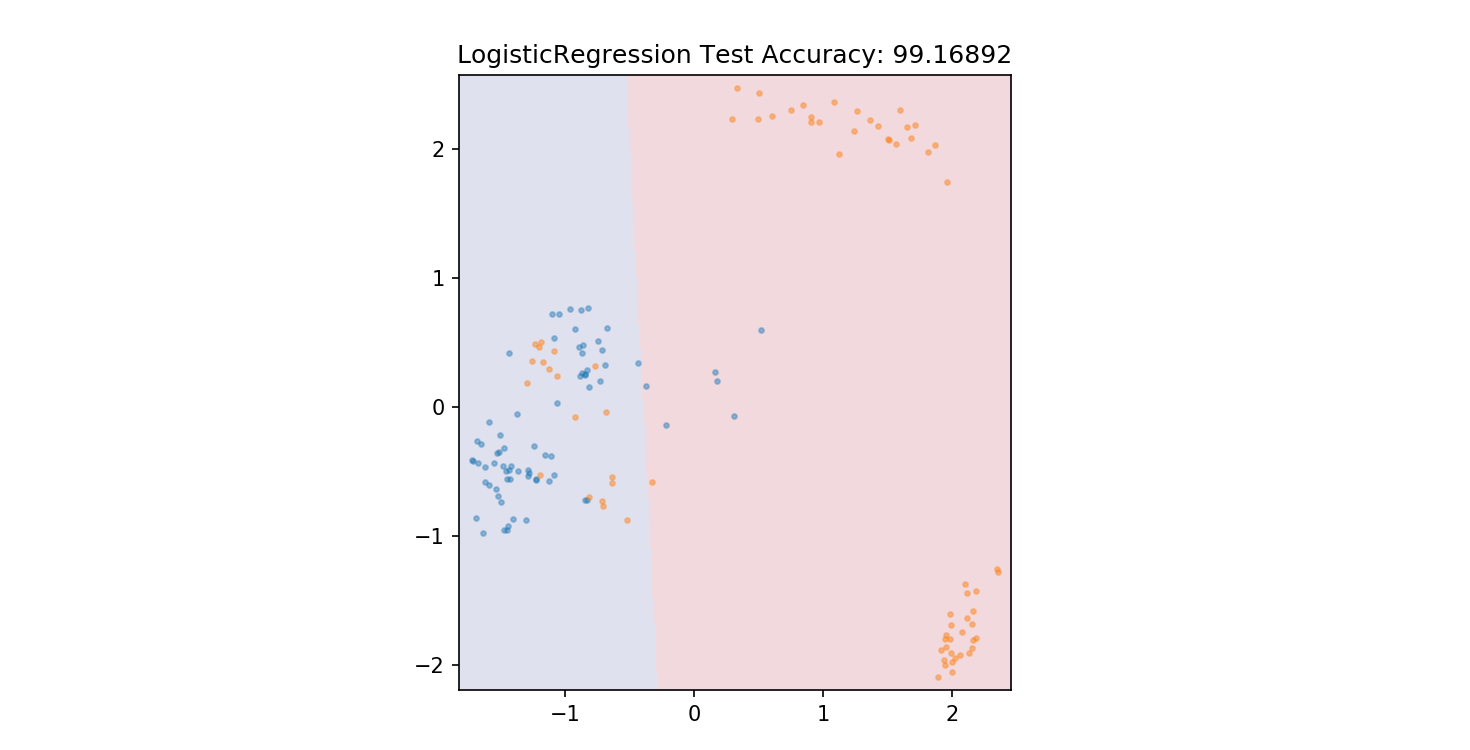

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


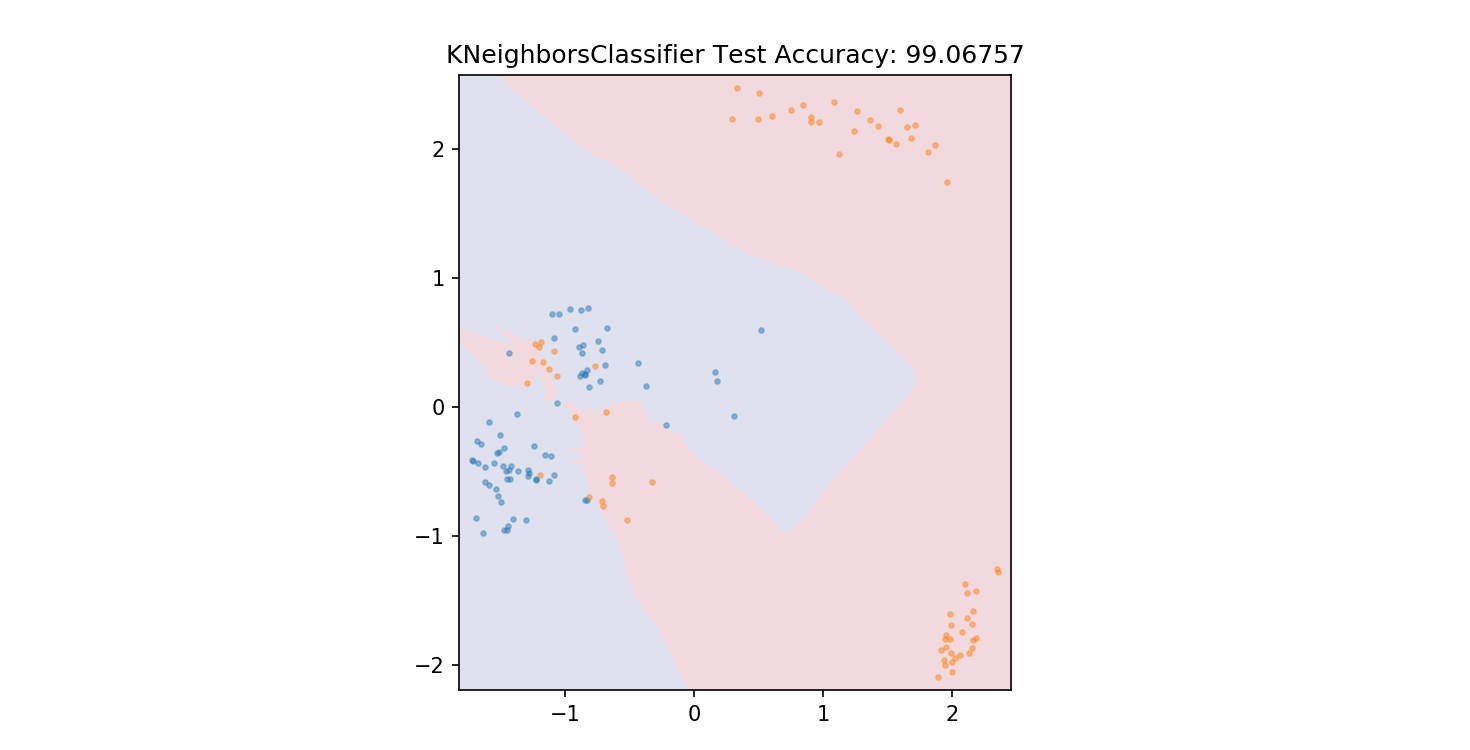

In [4]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)